# EDA

See a comperhansive overview and details on this dataset [here](https://www.kaggle.com/ajay1735/hmeq-data).

In this stage of The Project, the data will be explored using commonly used methods in the folowing steps:

1. **Basic Data Exploration** - check what the data set comprises of in terms of:
    * Shape of the dataset
    * Data Types, missing values outliers
    * Inconsistencies (e.g. "Mr" vs "mr.") etc.
    * Visualizations
    * Etc.
2. **Reshaping Data** - changing the data:
    * Handeling duplications/invalid entries/outliers.
    * Data transformations.
    * Feature engineering.
    * Etc.
    
    
 
## Basic Data Preparation

before begining the analysis the data will be split to avoid data leakage.
first the data will split to inputes and targets, and then to the Train and Test sets, and then split the training data to the validation set.
The data is small so a cross validation is needed to be representative enough to the data's actual distribution and bias and prevent overfitting.

In [3]:
import pandas as pd
import cufflinks as cf; cf.go_offline()
df = pd.read_csv("Data/hmeq.csv")
df.shape

(5960, 13)

In [4]:
df.sample(3)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
2011,0,12900,70167.0,90812.0,HomeImp,Office,25.0,0.0,0.0,177.080627,2.0,13.0,40.225696
379,0,6400,99131.0,125652.0,HomeImp,Other,8.0,NaN,NaN,419.375154,1.0,50.0,42.244928
3845,0,20100,57192.0,82870.0,DebtCon,Other,5.0,NaN,NaN,91.701437,0.0,7.0,36.635231


In [5]:
from sklearn.model_selection import train_test_split
X = df.drop("BAD", axis = 1)
y = df["BAD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.25) # 25% of 80% is 20%
print(f"Train set: X_train size: {X_train2.shape}, X_train size: {y_train2.shape}")
print(f"Cross val set: X_train size: {X_val.shape}, X_train size: {y_val.shape}")
print(f"test set: X_train size: {X_test.shape}, X_train size: {y_test.shape}")

Train set: X_train size: (3576, 12), X_train size: (3576,)
Cross val set: X_train size: (1192, 12), X_train size: (1192,)
test set: X_train size: (1192, 12), X_train size: (1192,)


In [8]:
Train = X_train2.copy()
Train["BAD"] = y_train2
Train.sample(3)# display how the data looks after prep

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,BAD
4275,22300,71800.0,100000.0,DebtCon,Sales,0.1,0.0,0.0,220.133333,1.0,26.0,NaN,1
1337,10600,31216.0,44716.0,DebtCon,Other,8.0,NaN,1.0,149.194648,6.0,29.0,37.88226,0
3806,20000,104000.0,139900.0,DebtCon,Other,15.0,1.0,1.0,95.366667,4.0,49.0,NaN,1


In [10]:
#cv set
Cross_val = X_val.copy()
Cross_val["BAD"] = y_val

#test set
Test = X_test.copy()
Test["BAD"] = y_test

print(f"Cross val set shape: {Cross_val.shape}, Test set shape: {Test.shape}")

Cross val set shape: (1192, 13), Test set shape: (1192, 13)


Now the data is split to 3 sets:

* **Training:** 60%

* **Cross validation:** 20%

* **Testing:** 20%

now the main focus will be on the train set

## Basic Data Exploration

Here we will try to better understand the data:

In [13]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3576 entries, 3749 to 5346
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     3576 non-null   int64  
 1   MORTDUE  3258 non-null   float64
 2   VALUE    3508 non-null   float64
 3   REASON   3426 non-null   object 
 4   JOB      3420 non-null   object 
 5   YOJ      3254 non-null   float64
 6   DEROG    3144 non-null   float64
 7   DELINQ   3222 non-null   float64
 8   CLAGE    3396 non-null   float64
 9   NINQ     3272 non-null   float64
 10  CLNO     3450 non-null   float64
 11  DEBTINC  2832 non-null   float64
 12  BAD      3576 non-null   int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 391.1+ KB


It seems the data has null columns, numeric and categoric data types.

let's see how much data is missing for all columns:

In [16]:
Train.isnull().sum()

LOAN         0
MORTDUE    318
VALUE       68
REASON     150
JOB        156
YOJ        322
DEROG      432
DELINQ     354
CLAGE      180
NINQ       304
CLNO       126
DEBTINC    744
BAD          0
dtype: int64

Let's see what percent is missing for each column:

In [20]:
round(Train.isnull().sum()/Train.shape[0]*100,2) #take the null counts, divide by row count and multiply by 100

LOAN        0.00
MORTDUE     8.89
VALUE       1.90
REASON      4.19
JOB         4.36
YOJ         9.00
DEROG      12.08
DELINQ      9.90
CLAGE       5.03
NINQ        8.50
CLNO        3.52
DEBTINC    20.81
BAD         0.00
dtype: float64

### Loan amount
let's see the distribution of the LOAN column:

In [31]:
Train.LOAN.describe() # number of unique values for LOANS that has been requested

count     3576.000000
mean     18754.306488
std      11312.361624
min       1100.000000
25%      11300.000000
50%      16500.000000
75%      23300.000000
max      89900.000000
Name: LOAN, dtype: float64

We see that Loans have a high variance and the mean is higher than the median,
let's plot the column:

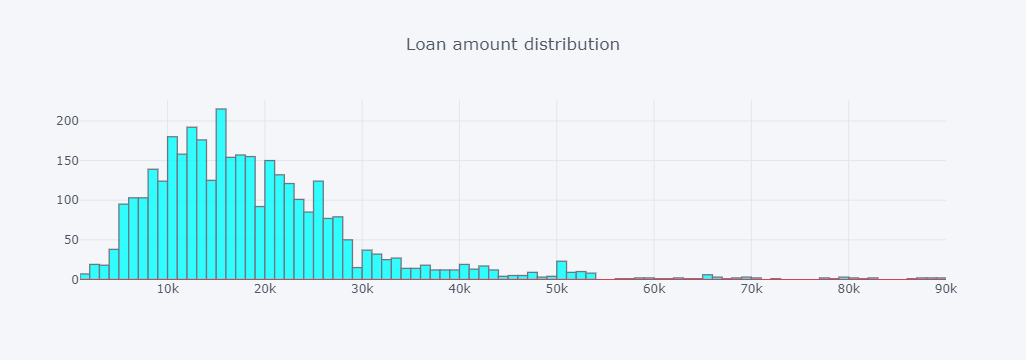

In [54]:
Train.LOAN.iplot(kind='hist', title = 'Loan amount distribution', hline=(0), color = ['cyan'])

We see that Loans have a high variance and the mean is higher than the median,
let's plot the column:

### Target Variable

let's see the distribution of the target column:

In [48]:
Train.BAD.value_counts()/Train.shape[0]*100,2

(0    80.005593
 1    19.994407
 Name: BAD, dtype: float64,
 2)

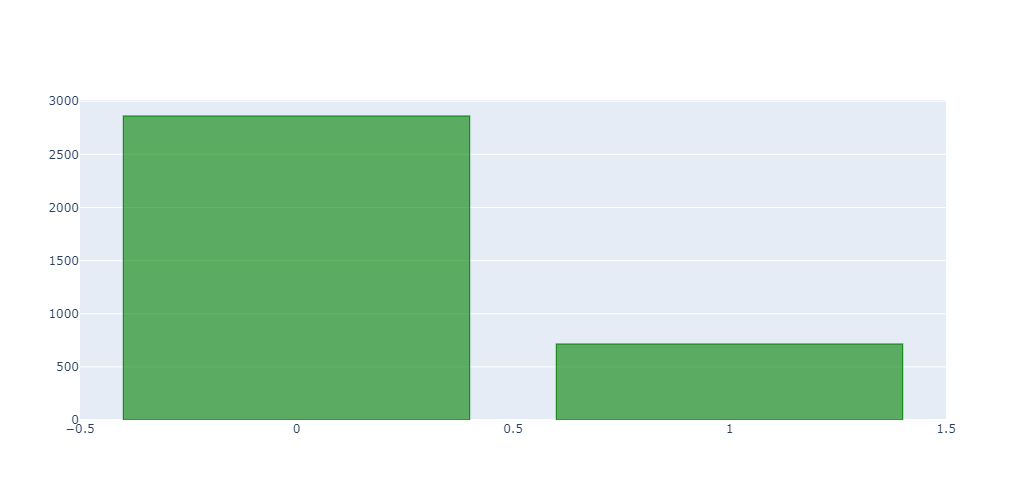

In [68]:
target_layout = cf.Layout(
    height=500,
    width=400
)
Train.BAD.value_counts().iplot(kind='bar',layout = target_layout, title = 'Default Flag distribution', hline=(0),colors=['green'])

### Numeric variables

now we will inspect the other numeric varaibles:

In [71]:
Floats = Train.select_dtypes(include = "float64").columns.tolist() #float variables
Train[Floats].describe()

,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,3258.000000,3508.000000,3254.000000,3144.000000,3222.000000,3396.000000,3272.000000,3450.000000,2832.000000
mean,74152.884362,101907.149128,8.913783,0.255725,0.459032,180.943254,1.199267,21.357391,33.946016
std,43826.526553,56865.856654,7.523192,0.830227,1.157309,87.115302,1.720458,10.038348,8.807388
min,2063.000000,9100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.720295
25%,46895.250000,66334.750000,3.000000,0.000000,0.000000,116.323866,0.000000,15.000000,29.245111
50%,65757.000000,89407.500000,7.000000,0.000000,0.000000,174.371961,1.000000,20.000000,34.874107
75%,92560.000000,119758.250000,13.000000,0.000000,0.000000,231.123012,2.000000,26.000000,39.179165
max,371003.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


now we will visualize this data:

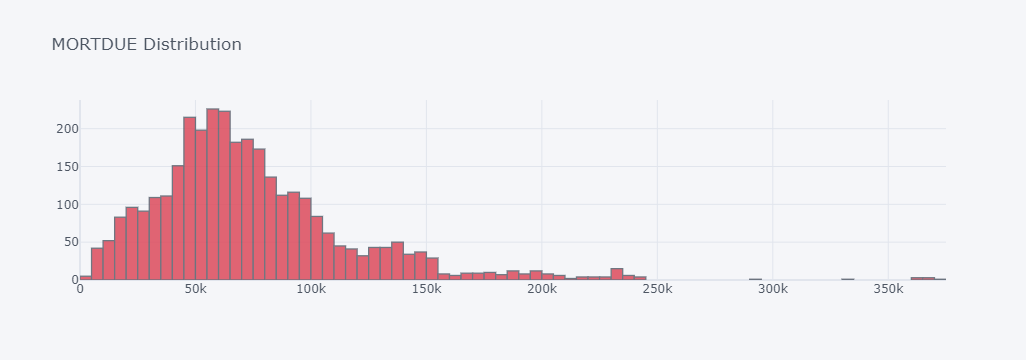

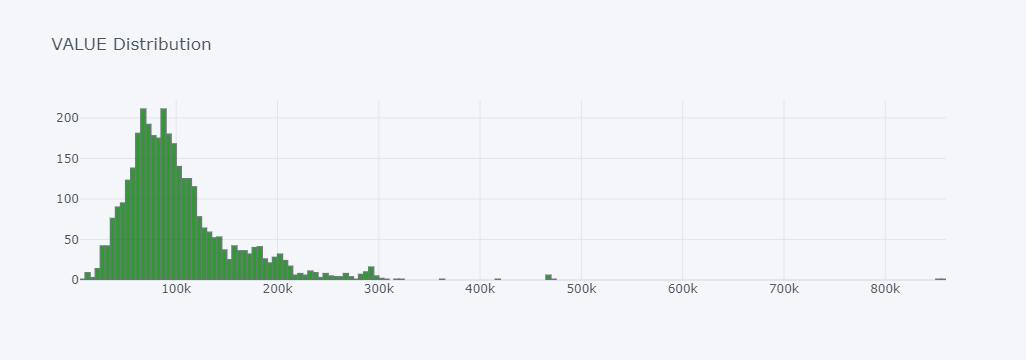

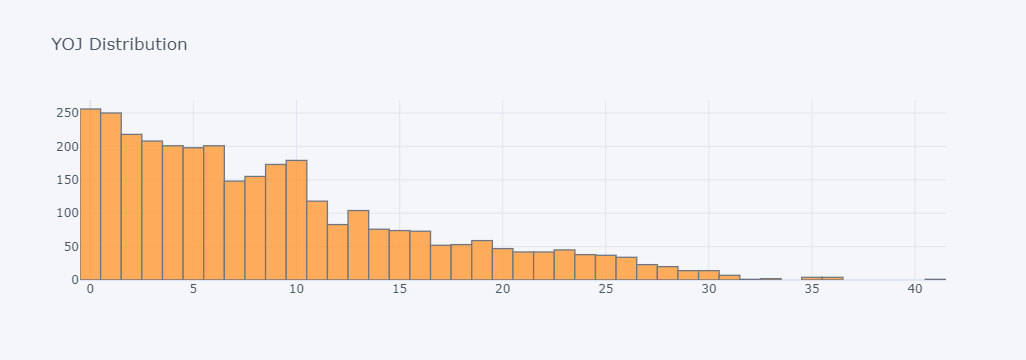

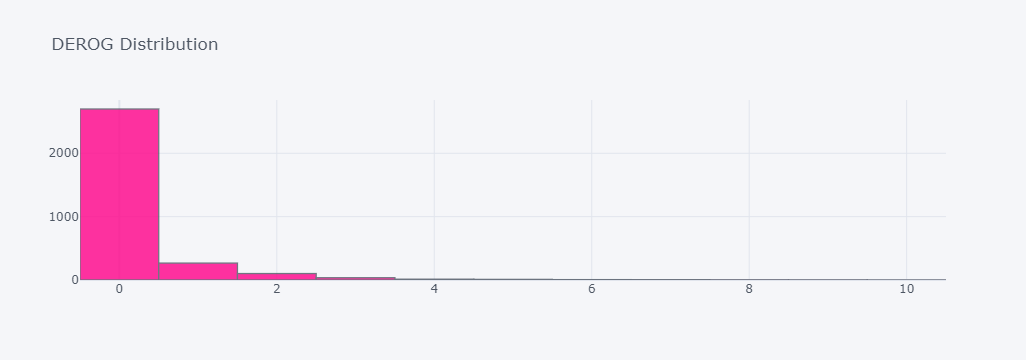

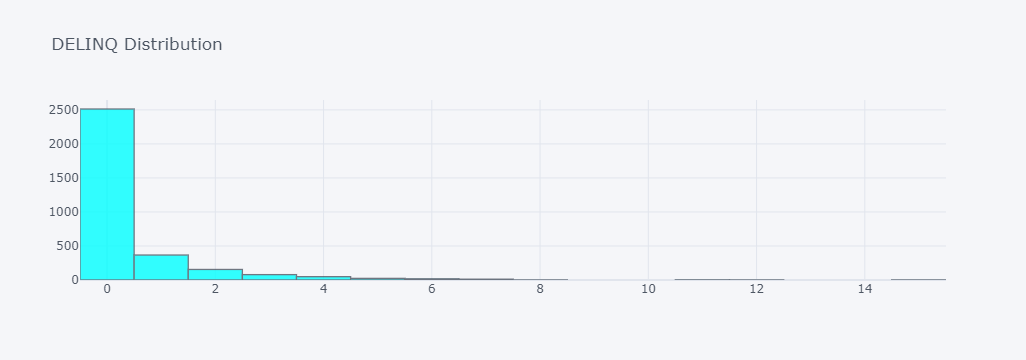

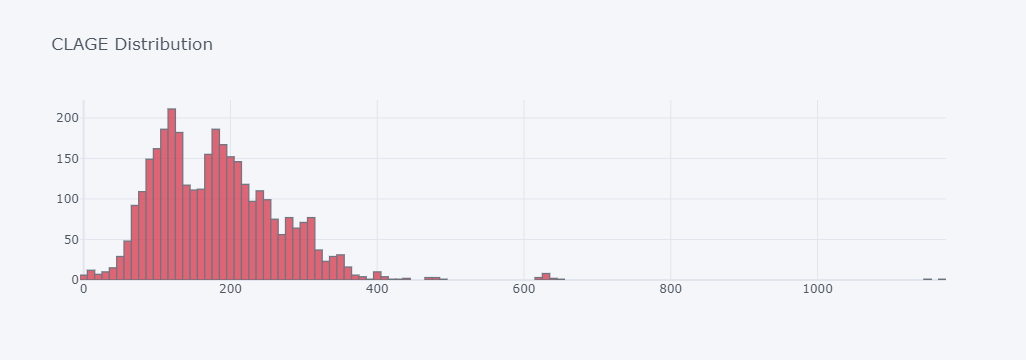

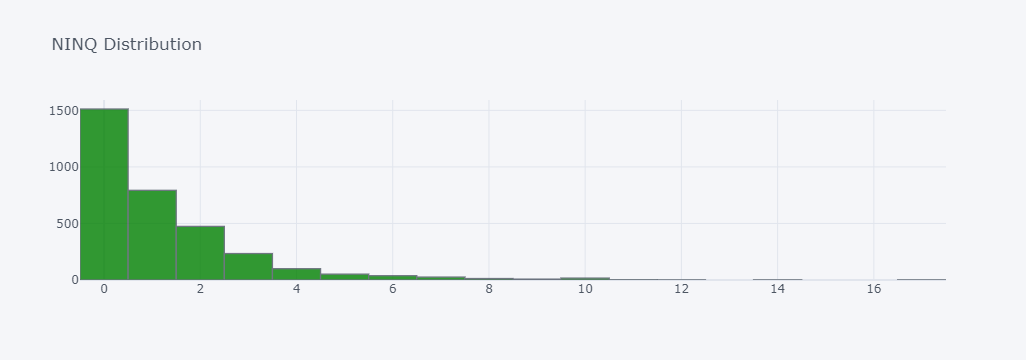

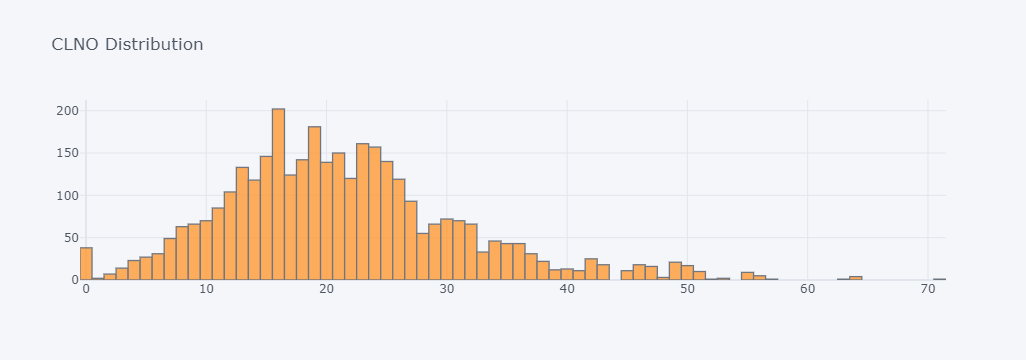

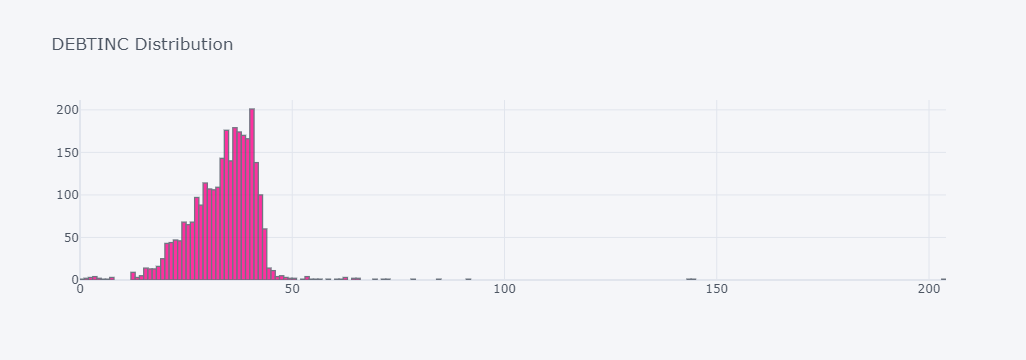

In [84]:
colors = ["red","green","orange","pink","cyan","red","green","orange","pink"]
for color,col in enumerate(Floats):    
    Train[col].iplot(kind='histogram',title = f"{col} Distribution",color = colors[color], filename='histogram-subplots')